## Semester Project
### Name: Manahil Ahmad
### Roll No. F20BDATS1E01024

## Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings

## Load the Dataset

In [5]:
# Loading the dataset
data = pd.read_csv(r'C:\Users\Lapotop Land\Downloads\Manahil\P_Data_Extract_From_World_Development_Indicators (1).csv')

## Check for missing values

In [6]:
data.isnull()

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, urban (% of urban population)","Access to electricity, rural (% of rural population)","Cause of death, by injury (% of total)","Central government debt, total (% of GDP)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)"
0,False,False,True,True,True,False,False,False,True,True,True,True
1,False,False,True,True,True,False,False,False,True,True,True,True
2,False,False,True,True,True,False,False,False,True,True,True,True
3,False,False,True,True,True,True,True,True,True,True,True,True
4,False,False,True,True,True,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
370,False,False,True,True,True,True,True,True,True,True,True,True
371,False,False,True,True,True,True,True,True,True,True,True,True
372,False,False,True,True,True,True,True,True,True,True,True,True
373,False,False,True,True,True,True,True,True,True,True,True,True


## Handle missing values

In [7]:
data_filled = data.fillna(0)  # Filling null values with 0
data_filled

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, urban (% of urban population)","Access to electricity, rural (% of rural population)","Cause of death, by injury (% of total)","Central government debt, total (% of GDP)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)"
0,Pakistan,1999,0.0,0.0,0.0,70.26535,93.446159,58.959632,0.0,0.0,0.0,0.0
1,Poland,1999,0.0,0.0,0.0,100.00000,100.000000,100.000000,0.0,0.0,0.0,0.0
2,Qatar,1999,0.0,0.0,0.0,100.00000,100.000000,100.000000,0.0,0.0,0.0,0.0
3,Turkiye,1999,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,United Arab Emirates,1999,0.0,0.0,0.0,100.00000,100.000000,100.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Australia,2023,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
371,Azerbaijan,2023,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
372,Bahrain,2023,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
373,Bangladesh,2023,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


## Descriptive Statistics

In [8]:
data.describe()

,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, urban (% of urban population)","Access to electricity, rural (% of rural population)","Cause of death, by injury (% of total)","Central government debt, total (% of GDP)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)"
count,375.000000,330.000000,330.000000,330.000000,343.000000,343.000000,342.000000,60.000000,126.000000,60.000000,56.000000
mean,2011.000000,83.899848,77.800758,92.877727,95.943180,98.863043,94.674998,8.090358,47.181933,10.272252,58.049643
std,7.220737,28.028294,35.173857,15.752807,11.935969,3.801557,15.194893,5.582501,21.714952,11.274955,32.692682
min,1999.000000,7.800000,0.800000,34.500000,29.540215,75.489548,15.658129,3.688806,1.845685,2.671163,3.750000
25%,2005.000000,83.725000,70.825000,96.625000,99.800280,99.800000,100.000000,4.797173,29.758640,4.570883,29.182500
50%,2011.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,5.859079,45.149410,5.750362,62.270000
75%,2017.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,8.761846,59.790984,9.538272,90.622500
max,2023.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,25.849680,99.909698,50.246653,100.000000


## Characterize different types of Data

In [9]:
# Checking the data types of each column
data_types = data.dtypes
print("Data Types:")
print(data_types)

Data Types:
Country Name                                                                                                                                    object
Year                                                                                                                                             int64
Access to clean fuels and technologies for cooking (% of population)                                                                           float64
Access to clean fuels and technologies for cooking, rural (% of rural population)                                                              float64
Access to clean fuels and technologies for cooking, urban (% of urban population)                                                              float64
Access to electricity (% of population)                                                                                                        float64
Access to electricity, urban (% of urban population)                              

## Correlation between variables of interest

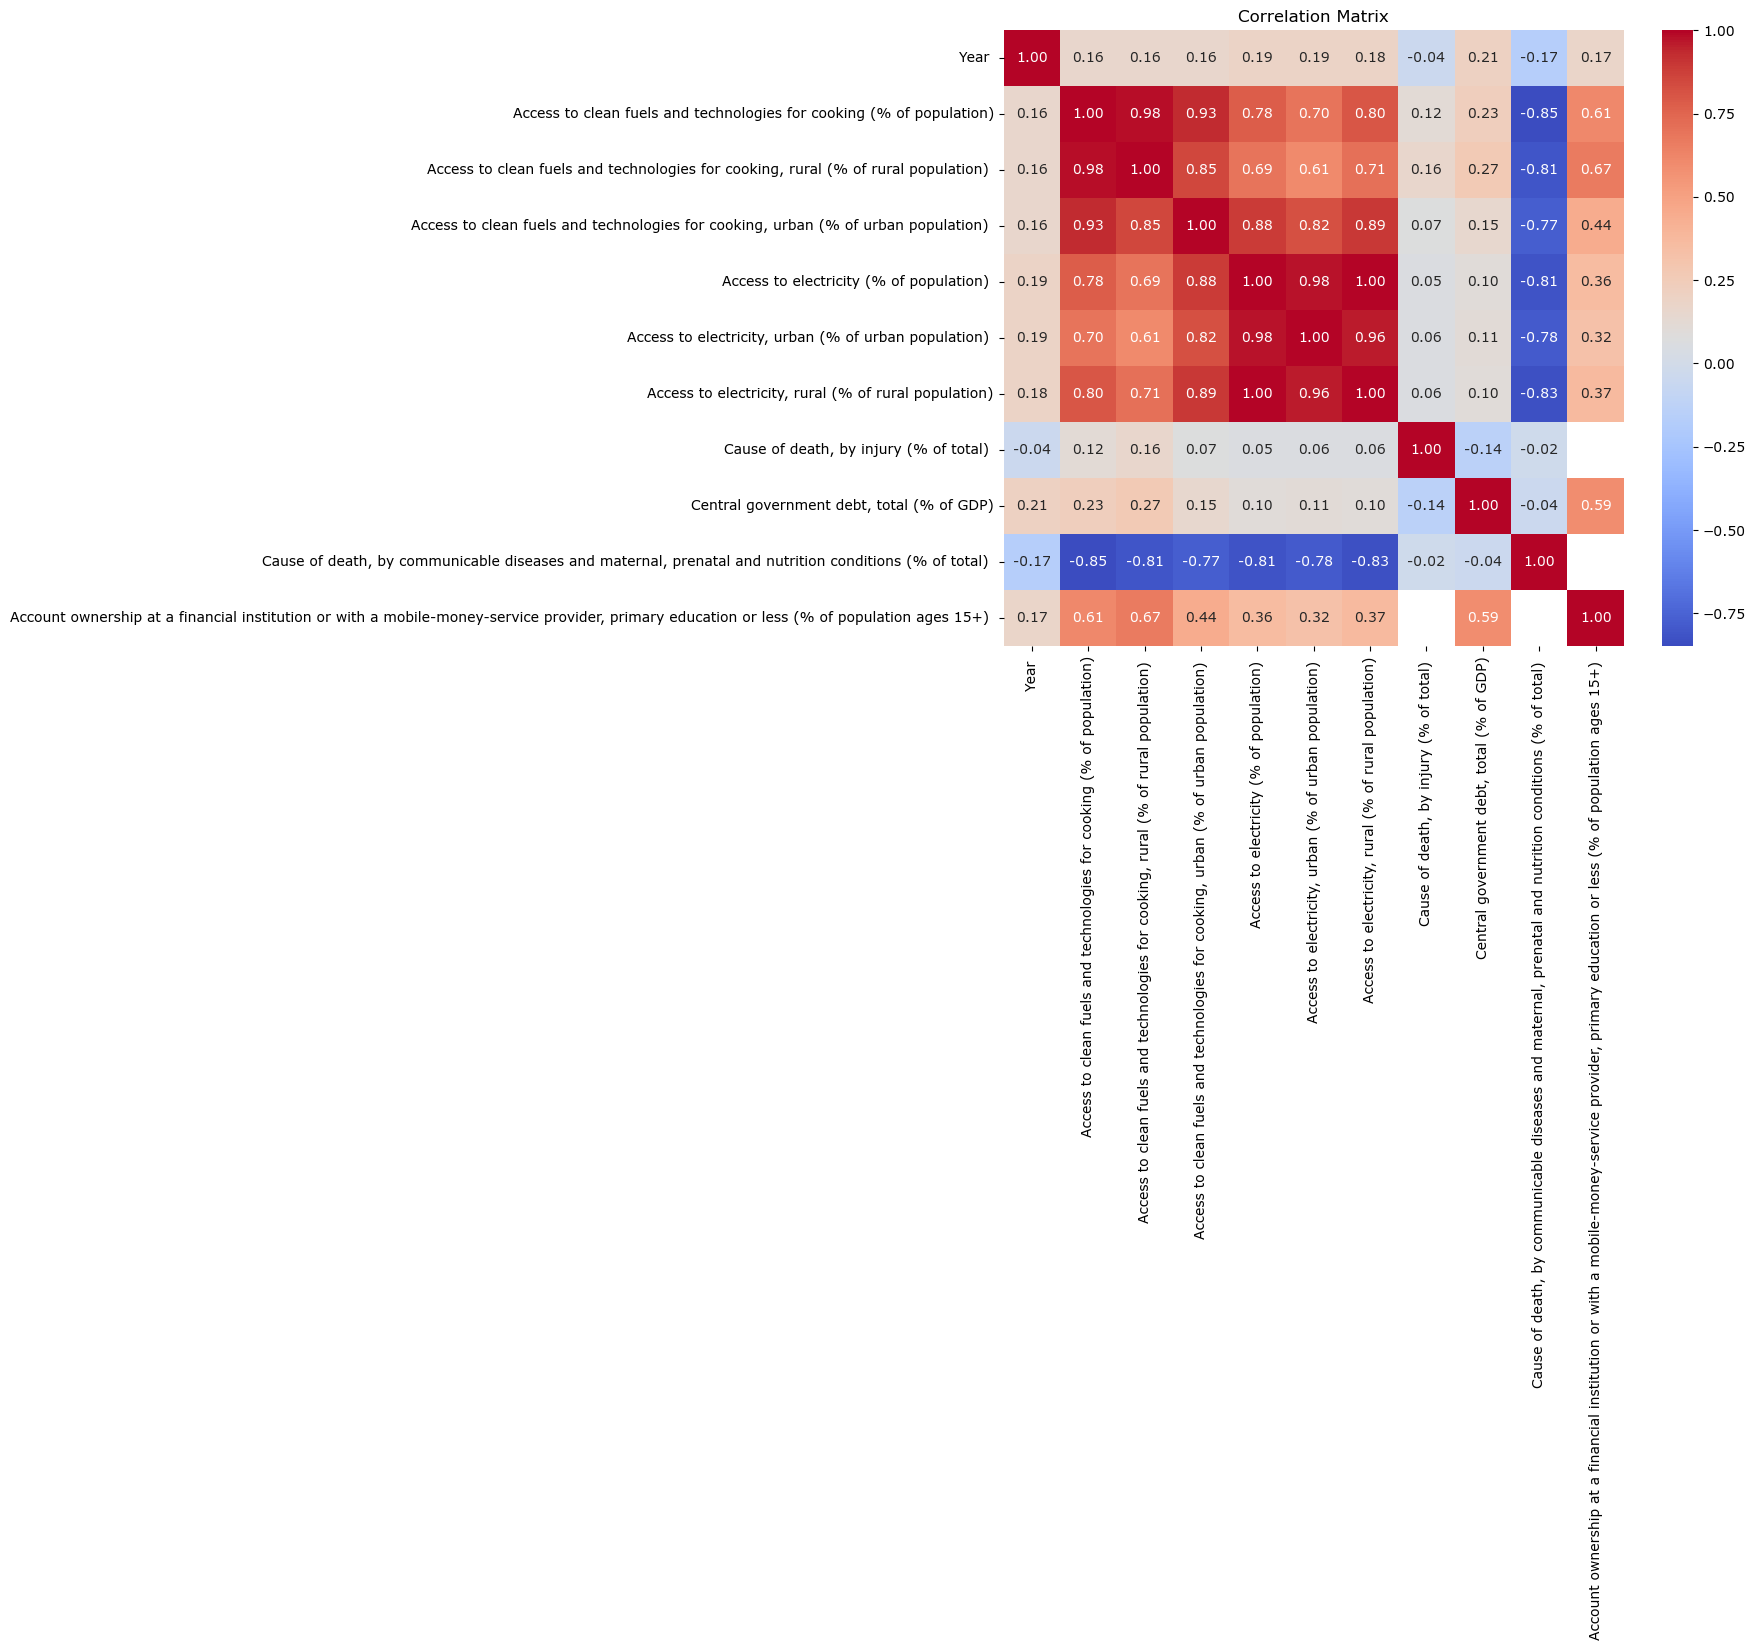

In [10]:
# Excluding non-numeric columns before calculating correlation matrix
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Hypothesis Testing

In [11]:
# Filtering the dataset for urban and rural areas
urban_access = data['Access to clean fuels and technologies for cooking, urban (% of urban population) ']
rural_access = data['Access to clean fuels and technologies for cooking, rural (% of rural population) ']

# Performing t-test
t_statistic, p_value = stats.ttest_ind(urban_access, rural_access)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpreting the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: The means are not significantly different.


## Multiple Regression Model

In [12]:
# Preparing the data
X = data[['Access to clean fuels and technologies for cooking (% of population)', 'Central government debt, total (% of GDP)']]
y = data['Access to electricity (% of population) ']

In [13]:
# Handling the missing values
X = X.dropna()  # Drop rows with missing values
y = y[X.index]  # Update y to match the filtered rows in X

In [14]:
# Handling infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
X = X.dropna()  # Drop rows with NaN values
y = y[X.index]  # Update y to match the filtered rows in X

In [15]:
# Adding constant to independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Printing model summary
print(model.summary())

                                       OLS Regression Results                                       
Dep. Variable:     Access to electricity (% of population)    R-squared:                       0.525
Model:                                                  OLS   Adj. R-squared:                  0.517
Method:                                       Least Squares   F-statistic:                     62.99
Date:                                      Mon, 26 Aug 2024   Prob (F-statistic):           3.75e-19
Time:                                              16:19:40   Log-Likelihood:                -393.24
No. Observations:                                       117   AIC:                             792.5
Df Residuals:                                           114   BIC:                             800.8
Df Model:                                                 2                                         
Covariance Type:                                  nonrobust                                

## Marginal Effects

In [16]:
# Geting the coefficients
coefficients = model.params

# Calculating marginal effects
marginal_effects = coefficients * X.mean()

print("Marginal Effects:")
print(marginal_effects)

Marginal Effects:
const                                                                   66.103776
Access to clean fuels and technologies for cooking (% of population)    33.386369
Central government debt, total (% of GDP)                               -1.351045
dtype: float64


## Relationship between Access to Clean Fuels and Access to Electricity

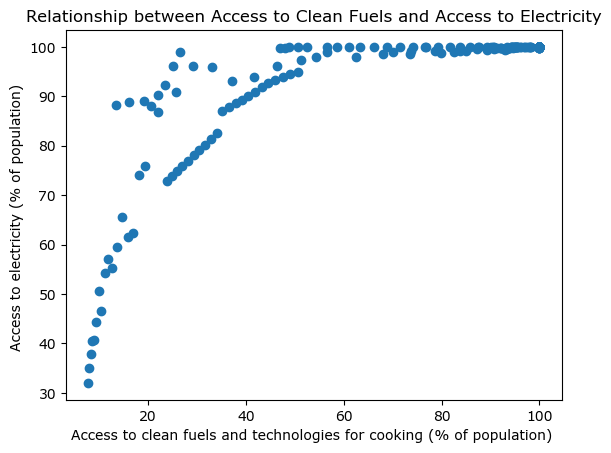

In [17]:
plt.scatter(data['Access to clean fuels and technologies for cooking (% of population)'], data['Access to electricity (% of population) '])
plt.xlabel('Access to clean fuels and technologies for cooking (% of population) ')
plt.ylabel('Access to electricity (% of population) ')
plt.title('Relationship between Access to Clean Fuels and Access to Electricity')
plt.show()

## ARIMA Model

In [18]:
# Filtering data for Pakistan
pakistan_data = data[data['Country Name'] == 'Pakistan']

In [19]:
# Droping rows with missing values in the variable of interest
pakistan_data.dropna(subset=['Access to clean fuels and technologies for cooking (% of population)'], inplace=True)

C:\Users\Lapotop Land\AppData\Local\Temp\ipykernel_13124\87905642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pakistan_data.dropna(subset=['Access to clean fuels and technologies for cooking (% of population)'], inplace=True)


In [20]:
# Converting 'Year' to datetime format
pakistan_data['Year '] = pd.to_datetime(pakistan_data['Year '], format='%Y')

C:\Users\Lapotop Land\AppData\Local\Temp\ipykernel_13124\1864296654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pakistan_data['Year '] = pd.to_datetime(pakistan_data['Year '], format='%Y')


In [21]:
# Seting 'Year' as index
pakistan_data.set_index('Year ', inplace=True)

In [22]:
# Selecting the variable of interest
variable_of_interest = pakistan_data['Access to clean fuels and technologies for cooking (% of population)']

In [23]:
# Fit ARIMA model
model = ARIMA(variable_of_interest, order=(5,1,0)) 
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [24]:
# Printing model summary
print(model_fit.summary())

                                                        SARIMAX Results                                                         
Dep. Variable:     Access to clean fuels and technologies for cooking (% of population)   No. Observations:                   22
Model:                                                                   ARIMA(5, 1, 0)   Log Likelihood                  12.601
Date:                                                                  Mon, 26 Aug 2024   AIC                            -13.203
Time:                                                                          16:19:51   BIC                             -6.935
Sample:                                                                      01-01-2000   HQIC                           -11.842
                                                                           - 01-01-2021                                         
Covariance Type:                                                                    opg          

## Plot of Residuals

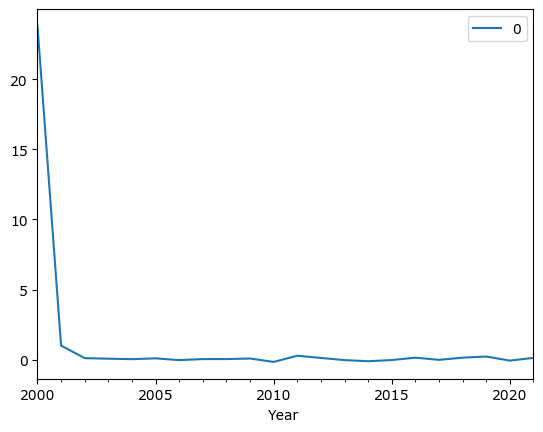

In [25]:
# Ploting residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

## Observed Vs. Forecasted Values

In [26]:
# Forecasting future values
forecast_steps = 10  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

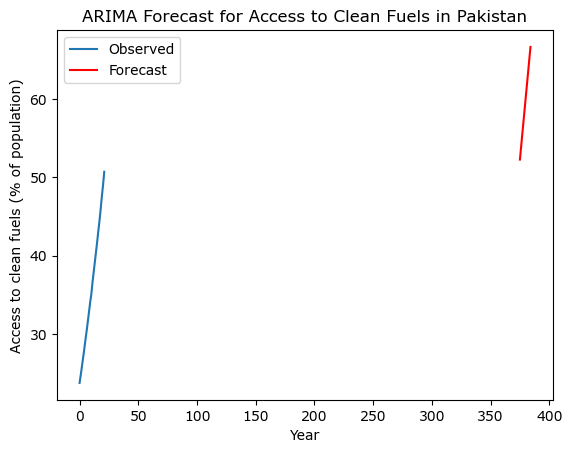

In [32]:
# Converting forecast index to numpy array
forecast_index = pd.date_range(start='2023-01-01', periods=10, freq='D')
forecast_index_array = forecast_index.to_numpy()

# Ploting observed values
index_array = np.arange(len(variable_of_interest))
plt.plot(index_array, variable_of_interest.values, label='Observed')

# Ploting forecasted values
forecast_index_array = np.arange(data.index.max() + 1, data.index.max() + forecast_steps + 1)
forecast_values_array = np.ravel(forecast)  # Convert forecast to 1D array
plt.plot(forecast_index_array, forecast_values_array, label='Forecast', color='red')


# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Access to clean fuels (% of population)')
plt.title('ARIMA Forecast for Access to Clean Fuels in Pakistan')
plt.legend()

# Show plot
plt.show()

## Correlogram of the Residuals

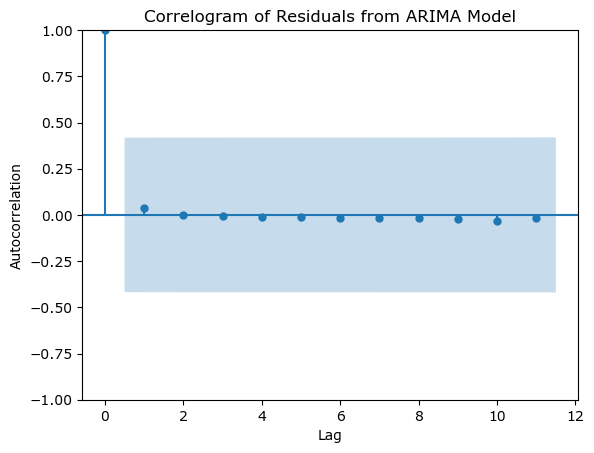

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

# Ploting the correlogram of the residuals
plot_acf(model_fit.resid)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Correlogram of Residuals from ARIMA Model')
plt.show()